In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

from matplotlib import pyplot as plt
import numpy as np

In [2]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
    
    @property
    def metrics(self): 
        return [self.loss_tracker]

    
    def train_step(self, data):
        batch_size = 100
        x = tf.random.uniform((batch_size,1), minval=-5, maxval=5)
        
        with tf.GradientTape() as tape:
            #Compute the Loss Value
            with tf.GradientTape() as tape2:
                tape2.watch(x)
                #y_pred = self(x, training=True)
                
                with tf.GradientTape() as tape3:
                    tape3.watch(x)
                    y_pred = self(x, training=True)
                    
                y_x=tape3.gradient(y_pred,x)
            
            
            y_xx=tape2.gradient(y_x,x)
            
            
            #dy = tape2.gradient(y_pred, x)
            x_o = tf.zeros((batch_size,1))
            y_o = self(x_o, training=True)
            eq = y_xx + y_pred
            ic = y_o - 1
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0.,ic)
            
        #Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
        self.loss_tracker.update_state(loss)
        #Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}


In [3]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.summary()

model.compile(optimizer=Adam(), metrics=['loss'])

x=tf.linspace(-5,5,100)
history = model.fit(x,epochs=1000,verbose=1)

x_testv = tf.linspace(-5,5,100)
a=model.predict(x_testv)

Model: "od_esolver"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 2s 6ms/step - loss: 1.0735
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.9113
Epoch 3/1000
4/4 [==============

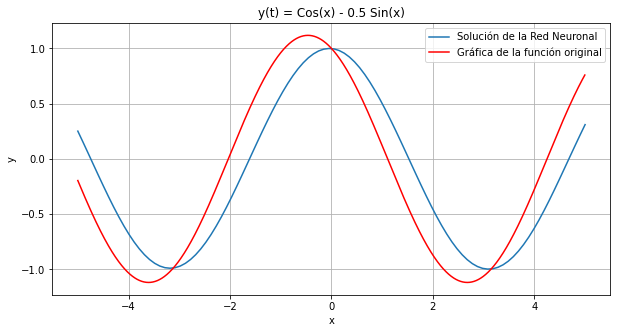

In [4]:
x_1 =np.arange(-5,5, 0.005) 
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(x_testv,a, label='Solución de la Red Neuronal')

plt.plot(x_1,(np.cos(x_1) - 0.5*(np.sin(x_1))), label='Gráfica de la función original', color='red')

plt.title( "y(t) = Cos(x) - 0.5 Sin(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(which='both')
plt.legend()
plt.show()